# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [90]:
import pandas as pd
import numpy as np
import glob
import os
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

#Autosave
%load_ext autoreload
%autoreload 2

from dateutil import parser
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per month of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

### 1.1 Creation of 3 dataframes

In [100]:
#Create 3 dataframes for each country : Guinea, Liberia and Sierra Leone
guinea_frame = pd.DataFrame(columns = ['Country','New cases','New deaths'])
liberia_frame = pd.DataFrame(columns = ['Country','New cases','New deaths'])
sierra_leone_frame = pd.DataFrame(columns = ['Country','New cases','New deaths'])


# GUINEA
guinea_path = DATA_FOLDER + "/ebola/guinea_data"            
all_files = glob.glob(os.path.join(guinea_path, "*.csv"))     # select all .csv files in the directory

for file in all_files:
    current_day = pd.read_csv(file, header = None)     # Read CSV data from one file
    # Data selected:
    # current_day.loc[1,0] = Date  <= Used as index for the dataframe
    # current_day.loc[1,2] = "New cases of suspects"
    # current_day.loc[2,2] = "New cases of probables"
    # current_day.loc[3,2] = "New cases of confirmed"
    # So, ebola_cases is the sum of the three
    # current_day.loc[10,2] = "New deaths registered"
    ebola_cases = float(current_day.loc[1,2]) + float(current_day.loc[2,2]) + float(current_day.loc[3,2])
    guinea_frame.loc[parser.parse(current_day.loc[1,0])] = ['Guinea', ebola_cases, float(current_day.loc[10,2])]
    
    
# LIBERIA
liberia_path = DATA_FOLDER + "/ebola/liberia_data"              
all_files = glob.glob(os.path.join(liberia_path, "*.csv"))    

for file in all_files:
    current_day = pd.read_csv(file, header = None).fillna(0)
    # Data selected:
    # current_day.loc[1,0] = Date  <= Used as index for the dataframe
    # current_day.loc[24,2] = "New Case/s (Suspected)"
    # current_day.loc[25,2] = "New Case/s (Probable)"
    # current_day.loc[26,2] = "New case/s (confirmed)"
    # So, ebola_cases is the sum of the three
    # current_day.loc[4,2] = "Newly reported deaths"
    ebola_cases = float(current_day.loc[24,2]) + float(current_day.loc[25,2]) + float(current_day.loc[26,2])
    liberia_frame.loc[parser.parse(current_day.loc[1,0])] = ['Liberia', ebola_cases, float(current_day.loc[4,2])]

    
#SIERRA LEONE
sierra_leone_path = DATA_FOLDER + "/ebola/sl_data"               # use your path
all_files = glob.glob(os.path.join(sierra_leone_path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

for file in all_files:
    current_day = pd.read_csv(file, header = None).fillna(0)
    # Data selected:
    # current_day.loc[1,0] = Date  <= Used as index for the dataframe
    # current_day.loc[3,16] = "new_suspected"
    # current_day.loc[4,16] = "new_probable"
    # current_day.loc[5,16] = "new_confirmed"
    # So, ebola_cases is the sum of the three
    # current_day.loc[17,16] = "etc_new_deaths"
    ebola_cases = float(current_day.loc[3,16]) + float(current_day.loc[4,16]) + float(current_day.loc[5,16])
    sierra_leone_frame.loc[parser.parse(current_day.loc[1,0])] = ['Sierra Leone', ebola_cases, float(current_day.loc[17,16])]

# To be sure, convert all values of the three dataframes to float
# Unified_df is the concatenation of the three previous dataframes
unified_df = pd.concat([guinea_frame, liberia_frame, sierra_leone_frame], axis=0, join='outer').fillna(0)

unified_df.head()

,Country,New cases,New deaths
2014-08-04,Guinea,9.0,2.0
2014-08-26,Guinea,0.0,5.0
2014-08-27,Guinea,22.0,2.0
2014-08-30,Guinea,24.0,5.0
2014-08-31,Guinea,46.0,3.0


### Creation of a unique dataframe

In [91]:
unified_df.index.name = "Month" #Add index name to be more efficient
grouped = unified_df.groupby([unified_df.index.month, 'Country']) # Use groupby to group all the rows by the month and the country

grouped.mean() # Apply the mean function to get daily average by month

New cases  New deaths
Month Country                              
6     Liberia          5.714286    2.000000
7     Liberia          8.545455    4.272727
8     Guinea          20.200000    3.400000
      Liberia         37.222222   23.222222
      Sierra Leone    25.150000    0.000000
9     Guinea          19.625000    3.562500
      Liberia         63.833333   36.041667
      Sierra Leone    40.689655    0.275862
10    Guinea          34.000000   15.000000
      Liberia       1046.320000   73.920000
      Sierra Leone    70.928571    3.535714
11    Liberia         26.466667   13.466667
      Sierra Leone    75.238095    0.571429
12    Liberia       5178.555556    0.000000
      Sierra Leone    41.000000    2.200000

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [99]:
path = DATA_FOLDER + "/microbiome/"
all_files = glob.glob(os.path.join(path, "MID?.xls"))   # Get all files that match MID + number

list_tmp = []

#For each sheet, add data into a global dataframe
for file in all_files:
    sheet = pd.read_excel(file, header=None, names=['NAME', 'COUNT'])
    
    # Add a column with the barcode (name of the file)
    start = file.find('MID')
    output = file[start:start + 4]
    sheet['BARCODE'] = output
    
    list_tmp.append(sheet)

# Create the dataframe by concatenating all list_tmp
frame = pd.concat(list_tmp, ignore_index=True) # Ignore index to get unique index for each row

# Read metadata sheet
metadata_frame = pd.read_excel(path + "metadata.xls")

# Merge dataframe with metadata dataframe with same BARCODE
# Fill na values by 'unknown'
final = pd.merge(frame, metadata_frame, on="BARCODE").fillna('unknown')
final = final.drop('BARCODE', axis=1)

final.head()

,NAME,COUNT,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,EXTRACTION CONTROL,unknown
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [5]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Useful plot functions

In [101]:
def plot_data_bar(data, ax, title='', ylabel=''):
    ax.set_xlabel(data.name)
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=14, fontweight='bold')
    sns.barplot(x=data.keys(), y=data.values,  ax=ax, palette="hls")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    

def plot_data_pie(data, ax, title=''):
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(data.name)
    ax.pie(data.values, labels=data.keys(), autopct='%1.1f%%')

### Load Titanic data

In [102]:
titanic = pd.read_excel('Data/titanic.xls',sheetname='titanic')

### Histogram data

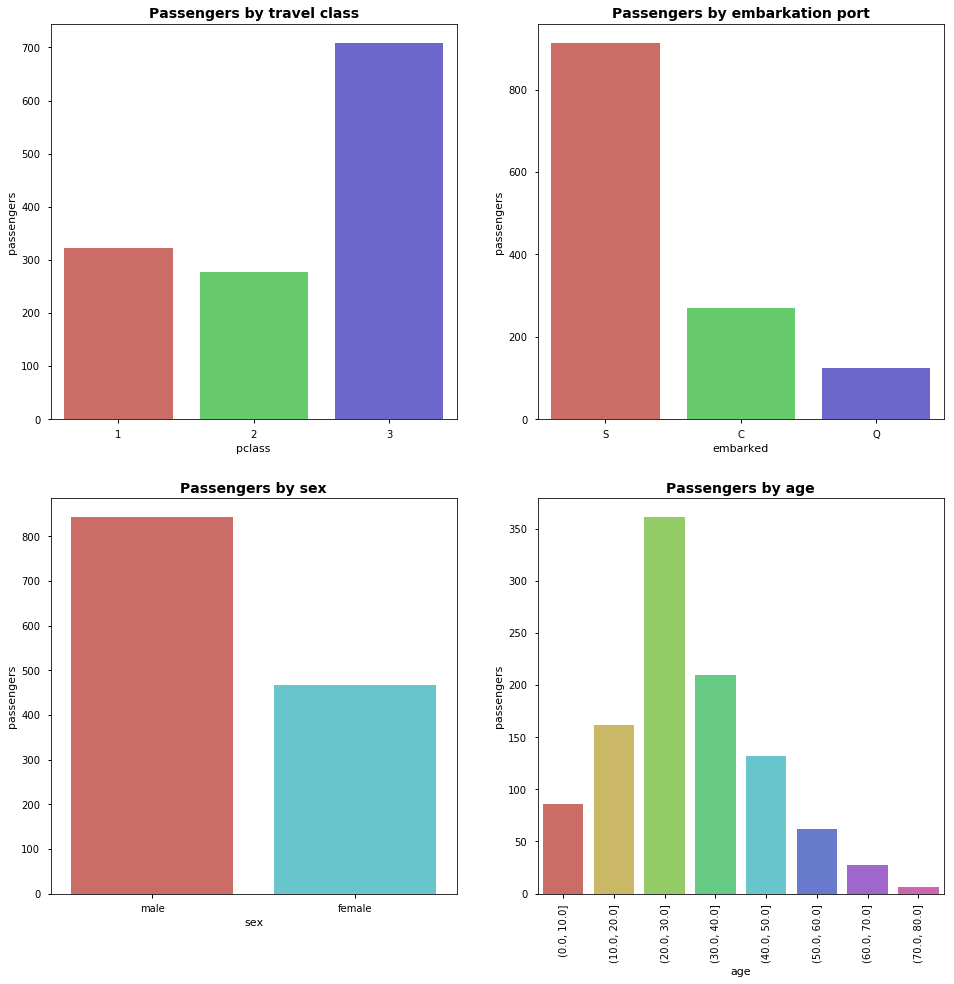

In [103]:
figure, axes = plt.subplots(2, 2, figsize=(16,16))

# Histogram travel class
data = titanic['pclass'].value_counts(dropna=False)
plot_data_bar(data, axes[0, 0], 'Passengers by travel class', 'passengers')

# Embarkation port
data = titanic['embarked'].value_counts(dropna=False)
plot_data_bar(data, axes[0, 1], 'Passengers by embarkation port', 'passengers')

# Sex
data = titanic['sex'].value_counts(dropna=False)
plot_data_bar(data, axes[1, 0], 'Passengers by sex', 'passengers')

# Age
age_decades = pd.cut(titanic['age'], [0, 10, 20, 30, 40, 50, 60, 70, titanic['age'].max() ]).value_counts()
plot_data_bar(age_decades, axes[1, 1], 'Passengers by age', 'passengers')

### Passengers by cabin floor

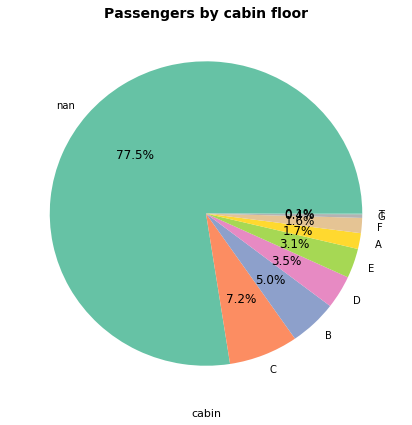

In [85]:
sns.set_palette("Set2", 10)
sns.set_context("notebook")

titanic_copy = titanic.copy()  #To not alterate titanic data
data = titanic_copy.cabin.str[:1].value_counts(dropna=False)
figure, ax = plt.subplots(1, 1, figsize=(7,7))
plot_data_pie(data, ax, 'Passengers by cabin floor')


### Survived passengers by travel class

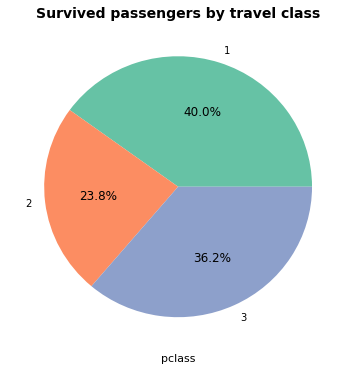

In [32]:
# Proportion of people who survived by travel class
data = titanic[titanic.survived == 1].groupby(['pclass'])['pclass'].count()
figure, ax = plt.subplots(1, 1, figsize=(6,6))
plot_data_pie(data, ax, 'Survived passengers by travel class')


### Survived passengers by travel class and by sex

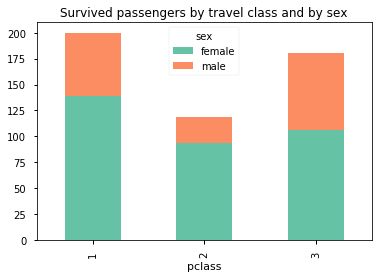

In [98]:
# Proportion of people who survived by travel class and by sex
data = titanic[titanic.survived == 1].groupby(['pclass', 'sex'])['sex']
survived_count = data_7.count().unstack("sex") #Unstack data to be on a same bar

#Plotting data
survived_count.plot(kind='bar', stacked=True, title='Survived passengers by travel class and by sex')

### Survival proportions by age category, travel class and sex

In [88]:
titanic_copy = titanic.copy()

#We take the median value to cut our data in two equally populated age categories
titanic_copy.age = pd.cut(titanic_copy.age, [0, titanic_copy['age'].median(), titanic_copy['age'].max()])

data = titanic_copy.groupby(['age', 'pclass', 'sex'])['survived'].mean() * 100    #Get the percentage value
data = pd.DataFrame(data)
data.columns = ['% survived'] #Update column name for a better reading
data

% survived
age          pclass sex               
(0.0, 28.0]  1      female   95.121951
                    male     53.125000
             2      female   91.071429
                    male     21.621622
             3      female   51.376147
                    male     18.303571
(28.0, 80.0] 1      female   96.739130
                    male     30.252101
             2      female   87.234043
                    male      8.333333
             3      female   37.209302
                    male     14.400000